In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13197 (\N{SQUARE MU G}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 13221 (\N{SQUARE M CUBED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/li

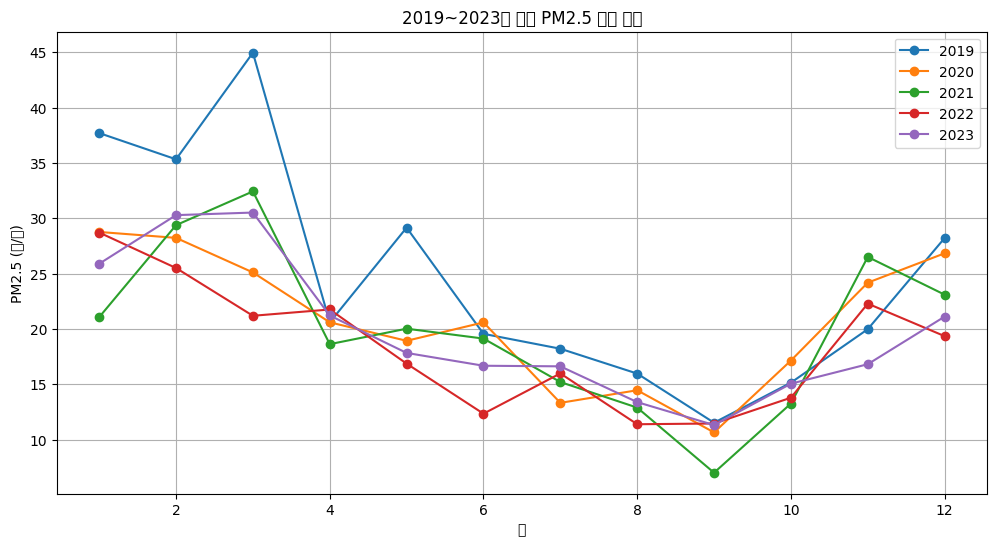

In [3]:
# 📌 서울시 미세먼지 데이터 병합 및 전처리 (2019~2023)
# Google Drive에 연도별 .csv 파일이 저장되어 있어야 함

from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Google Drive 마운트
drive.mount('/content/drive')

# 2️⃣ 연도별 파일 경로와 포함 연도 설정 (같은 파일에 2년치 있는 경우 고려)
file_paths = {
    "/content/drive/MyDrive/시계열2019.csv": [2019],
    "/content/drive/MyDrive/2020-2021.csv": [2020, 2021],
    "/content/drive/MyDrive/22.csv": [2022],
    "/content/drive/MyDrive/대기질 제공_2023.csv": [2023]
}

dfs = []

# 3️⃣ 전처리 및 병합
for path, years in file_paths.items():
    try:
        df = pd.read_csv(path, encoding='utf-8-sig')
    except UnicodeDecodeError:
        df = pd.read_csv(path, encoding='euc-kr')

    # 컬럼명 통일
    df.columns = ['일시', '지역', 'PM10', 'PM2.5']

    # 날짜 파싱
    df['일시'] = pd.to_datetime(df['일시'], errors='coerce')
    df = df.dropna(subset=['일시'])

    # 시계열 정보 추가
    df['연도'] = df['일시'].dt.year
    df['월'] = df['일시'].dt.month
    df['시간'] = df['일시'].dt.hour

    # 결측치 제거
    df = df.dropna(subset=['PM10', 'PM2.5'])

    # 연도 필터링 (예: 2020-2021.csv 중 2020, 2021만)
    df = df[df['연도'].isin(years)]

    dfs.append(df)

# 4️⃣ 병합
all_df = pd.concat(dfs, ignore_index=True)

# 5️⃣ 저장
all_df.to_csv("/content/drive/MyDrive/pm_data/서울시_대기질_2019_2023_통합.csv", index=False, encoding='utf-8-sig')

# 6️⃣ 연도별 PM2.5 시각화 (예시)
plt.figure(figsize=(12, 6))
for y in sorted(all_df['연도'].unique()):
    avg = all_df[all_df['연도'] == y].groupby('월')['PM2.5'].mean()
    plt.plot(avg.index, avg.values, marker='o', label=str(y))

plt.title("2019~2023년 월별 PM2.5 평균 추이")
plt.xlabel("월")
plt.ylabel("PM2.5 (㎍/㎥)")
plt.legend()
plt.grid(True)
plt.show()